

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
import pandas as pd
data = pd.read_csv('adult.data', header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
data['sex'].count()

32561

### Вопрос 2
Каков средний возраст мужчин?


In [79]:
male_data = data[data['sex']=='Male']
male_data['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [45]:
len(data[data['native-country']=='United-States']) / len(data)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

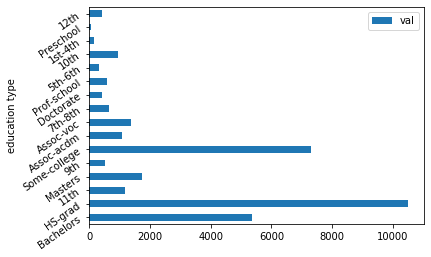

In [15]:
ed_type = data['education'].unique()
ed_type_count = []
for i in ed_type:
    ed_type_count.append(len(data[data['education'] == i]))

df = pd.DataFrame({'education type':ed_type, 'val':ed_type_count})
ax = df.plot.barh(x='education type', y='val', rot=35)


### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [23]:
data.groupby(data['marital-status'] == 'Divorced')['fnlwgt'].mean().values[1]

185802.79045689848

In [46]:
data.groupby(data['marital-status'] == 'Divorced')['fnlwgt'].std().values[1]

105646.78945933616

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [86]:
hight_sal = data[data['50K'] == '>50K']
sal_per = len(hight_sal[hight_sal['education'] == 'HS-grad']) / len(hight_sal) * 100
print(sal_per, "% -такой процент людей с высшим образованием зарабатывает более 50 тыс.")

# print("число людей с зарплатой >50K: ", len(hight_sal), "; из них HS-grad:", len(hight_sal[hight_sal['education'] == 'HS-grad']))


21.362071164392297 % -такой процент людей с высшим образованием зарабатывает более 50 тыс.


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [71]:
race_type = data['race'].unique()
max_age = 0
for i in race_type:
    max_age = data.groupby(data['race'] == i)['age'].max().values[1]
    print("Раса:", i, ", максимальный возраст:", max_age)

Раса: White , максимальный возраст: 90
Раса: Black , максимальный возраст: 90
Раса: Asian-Pac-Islander , максимальный возраст: 90
Раса: Amer-Indian-Eskimo , максимальный возраст: 82
Раса: Other , максимальный возраст: 77


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [76]:
job_FF =data[data['occupation'] == 'Farming-fishing']
print(job_FF['native-country'].unique())

['United-States' 'Cambodia' 'Poland' 'Guatemala' 'Mexico' 'England' '?'
 'Philippines' 'Italy' 'Puerto-Rico' 'Vietnam' 'Germany' 'Japan' 'Canada'
 'Yugoslavia' 'Cuba' 'Portugal' 'El-Salvador' 'Hong' 'Ireland' 'France']


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [87]:
male_BtoM = len(male_data[male_data["education"] == "Bachelors"])/len(male_data[male_data["education"] == "Masters"])

female_data = data[data['sex']=='Female']
female_BtoM = len(female_data[female_data["education"] == "Bachelors"])/len(female_data[female_data["education"] == "Masters"])
if(male_BtoM>female_BtoM):
    print("Отношение М-Б к M-М больше, чем Ж-Б к Ж-М")
elif(female_BtoM>male_BtoM):
    print("Отношение Ж-Б к Ж-М больше, чем М-Б к M-М")
else:
    print("Отношения равны")
    

Отношение М-Б к M-М больше, чем Ж-Б к Ж-М


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [95]:
max_hours = data['hours-per-week'].max()
count_people = data[data['hours-per-week'] == max_hours]
print(len(count_people))
print(count_people['50K'].unique(), len(count_people[count_people['50K'] == '>50K']),"из", len(count_people), "получают >50т.")

85
['>50K' '<=50K'] 25 из 85 получают >50т.
